# Data Preparation

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('news_data.csv', sep='\t')
data.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [5]:
data.isna()

,category,filename,title,content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2220,False,False,False,False
2221,False,False,False,False
2222,False,False,False,False
2223,False,False,False,False


In [6]:
data.category.unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [7]:
data.category.value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


# Split into Train and Test

In [8]:
df = data[['content', 'category']]

In [9]:
X = df['content']
y = df['category']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Labels Detail

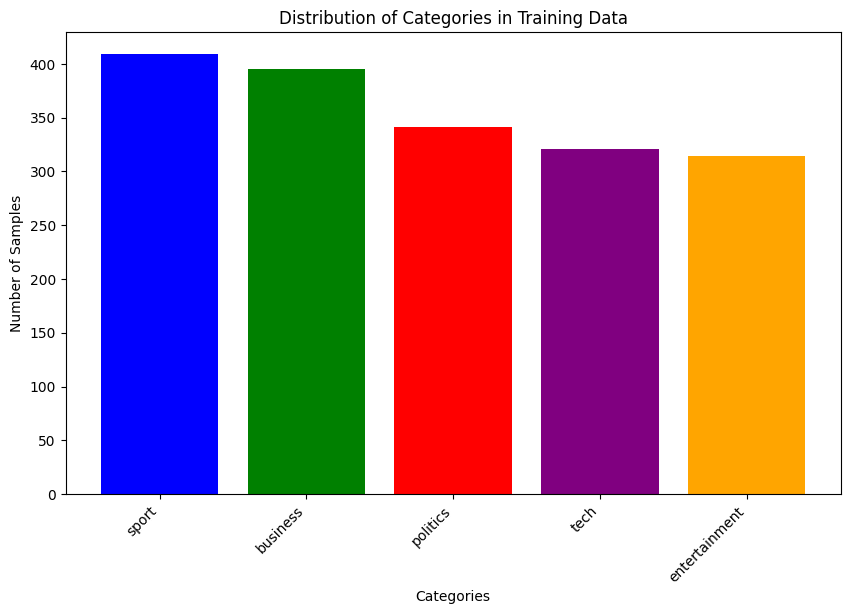

In [11]:
value_counts = y_train.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values,
        color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Categories')
plt.ylabel('Number of Samples')
plt.title('Distribution of Categories in Training Data')
plt.xticks(rotation=45, ha='right')
plt.show()

# Text Processing

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])


X_train = X_train.apply(remove_stopwords)
X_test = X_test.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize_text(text):
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
  return " ".join(lemmatized_words)


X_train = X_train.apply(stem_and_lemmatize_text)
X_test = X_test.apply(stem_and_lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Word Count

In [14]:
from collections import Counter

# Assuming X_train is a pandas Series or list of strings
def count_unique_words(X_train):
  """Counts the total number of unique words in X_train."""
  all_words = []
  for text in X_train:
    words = text.lower().split()
    all_words.extend(words)
  word_counts = Counter(all_words)
  return len(word_counts)


unique_word_count = count_unique_words(X_train)
print("Total unique words in X_train:", unique_word_count)

Total unique words in X_train: 45581


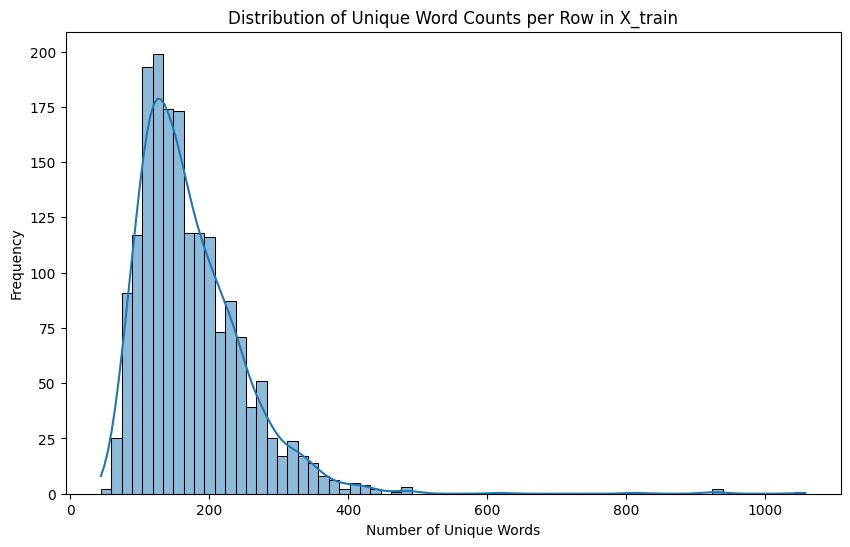

In [15]:
# Assuming X_train is a pandas Series
unique_word_counts = X_train.apply(lambda x: len(set(x.split())))

# Create a distribution plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(unique_word_counts, kde=True)
plt.title('Distribution of Unique Word Counts per Row in X_train')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

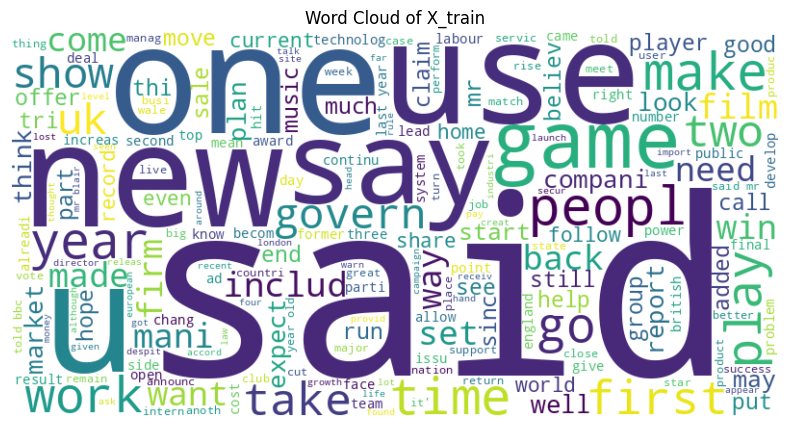

In [16]:
from wordcloud import WordCloud

# Assuming X_train is a pandas Series
all_text = ' '.join(X_train)

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of X_train')
plt.show()

# Feature Extraction

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,3),
    max_features=50000
)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [18]:
print(X_train_vectorized)

  (0, 994)	0.09049245601415574
  (0, 1184)	0.08532364134848716
  (0, 1185)	0.09049245601415574
  (0, 1282)	0.06847739372825724
  (0, 1349)	0.0720473274211414
  (0, 1690)	0.05618485114998659
  (0, 1923)	0.1440946548422828
  (0, 1924)	0.08532364134848716
  (0, 2054)	0.07452240218047795
  (0, 2055)	0.09049245601415574
  (0, 2066)	0.05153042937265824
  (0, 2226)	0.24717316380015097
  (0, 2232)	0.07546712064243974
  (0, 2266)	0.07881170499953603
  (0, 2267)	0.08532364134848716
  (0, 3105)	0.08532364134848716
  (0, 3710)	0.05052159745364505
  (0, 3930)	0.16791178879842164
  (0, 3944)	0.19865720609603837
  (0, 4549)	0.048836689466326196
  (0, 4551)	0.08335854921434138
  (0, 4552)	0.08335854921434138
  (0, 9271)	0.21846048583928657
  (0, 10232)	0.053470550165799866
  (0, 10245)	0.0543750333534145
  :	:
  (1779, 47311)	0.03706371014901252
  (1779, 47431)	0.04507189031621232
  (1779, 47437)	0.06620003404500077
  (1779, 47616)	0.050275802855577464
  (1779, 47773)	0.11031900269018709
  (1779, 4779

# Modeling and Evaluation

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.946067415730337
               precision    recall  f1-score   support

     business       0.91      0.96      0.93       115
entertainment       0.99      0.93      0.96        72
     politics       0.95      0.91      0.93        76
        sport       0.95      0.99      0.97       102
         tech       0.96      0.93      0.94        80

     accuracy                           0.95       445
    macro avg       0.95      0.94      0.95       445
 weighted avg       0.95      0.95      0.95       445



In [23]:
# Menyimpan model ke file .pkl
import pickle
filename = 'uas_mining.pkl'  # Nama file dengan ekstensi .pkl
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model berhasil disimpan ke file: {filename}")

Model berhasil disimpan ke file: uas_mining.pkl
